#### Import Dependencies

In [15]:
import sys
import numpy as np
import torch
from unityagents import UnityEnvironment


#### 1. Load the Unity Environment

In [3]:
env  = UnityEnvironment(file_name="UnityEnv/Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


#### Get Unity Environment's Brain information

In [4]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
observation_space = env_info.vector_observations[0]
observation_size = observation_space.size
num_action = brain.vector_action_space_size
print(observation_size, num_action)

37 4


#### 2. Create an agent for DQN and Train it until Episode is Solved

In [5]:
from DQN.dqn_agent import Agent
agent = Agent(state_size=observation_size, action_size=num_action, seed=0)


In [6]:
from collections import deque
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done) # increment the agent step function
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'model.pth')
            break
    return scores

scores = dqn()



Episode 100	Average Score: 1.25
Episode 200	Average Score: 4.42
Episode 300	Average Score: 7.52
Episode 400	Average Score: 10.44
Episode 500	Average Score: 12.17
Episode 543	Average Score: 13.06
Environment solved in 443 episodes!	Average Score: 13.06


#### 3. Plot The Scores Graph using Matplotlib

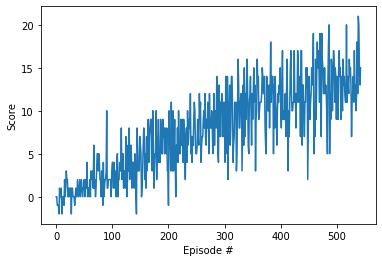

In [18]:
#plot the scores
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)

plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
fig.savefig("Results/BaseScores.png")

#### 4. Loading checkpoint for Testing the Banana agent!

In [14]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('model.pth'))

for i in range(5):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]
    for j in range(200):
        action = agent.act(state)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        state = env_info.vector_observations[0]   # get the next state
        done = env_info.local_done[0]
        
        if done:
            print("Next Episode")
            break
env.close()

Policy loaded


KeyboardInterrupt: 